We first import the packages we need and explore the data.

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import folium
import folium.plugins as fol_plugins
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Crimes_-_2001_to_Present.csv')

In [3]:
pd.set_option('display.max_columns', 500)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7382258 entries, 0 to 7382257
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [5]:
df.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      8455
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614837
Community Area          613480
FBI Code                     0
X Coordinate             73776
Y Coordinate             73776
Year                         0
Updated On                   0
Latitude                 73776
Longitude                73776
Location                 73776
dtype: int64

In [6]:
for column in df.columns:
    temp = df[column].nunique()
    print(f'{column}: {temp} unique entries')

ID: 7382258 unique entries
Case Number: 7381776 unique entries
Date: 3016295 unique entries
Block: 61694 unique entries
IUCR: 402 unique entries
Primary Type: 36 unique entries
Description: 538 unique entries
Location Description: 214 unique entries
Arrest: 2 unique entries
Domestic: 2 unique entries
Beat: 304 unique entries
District: 24 unique entries
Ward: 50 unique entries
Community Area: 78 unique entries
FBI Code: 26 unique entries
X Coordinate: 78839 unique entries
Y Coordinate: 130039 unique entries
Year: 21 unique entries
Updated On: 4344 unique entries
Latitude: 878006 unique entries
Longitude: 877432 unique entries
Location: 879226 unique entries


In [7]:
df.duplicated().any()

False

In [8]:
df[df.drop(columns=['ID']).duplicated(keep=False)].head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
238624,1061,G540323,09/08/2001 03:56:00 AM,005XX E 89 PLACE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,True,False,633,6.0,NaN,NaN,01A,1181431.0,1845756.0,2001,03/19/2019 04:11:22 PM,41.731990,-87.610929,"(41.731990385, -87.610929365)"
244605,1062,G540323,09/08/2001 03:56:00 AM,005XX E 89 PLACE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,True,False,633,6.0,NaN,NaN,01A,1181431.0,1845756.0,2001,03/19/2019 04:11:22 PM,41.731990,-87.610929,"(41.731990385, -87.610929365)"
654154,1122,G592219,10/03/2001 01:03:00 AM,016XX W 44 ST.,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,True,914,9.0,NaN,NaN,01A,1165945.0,1875532.0,2001,03/19/2019 04:11:22 PM,41.814042,-87.666816,"(41.814042305, -87.666815552)"
661178,1123,G592219,10/03/2001 01:03:00 AM,016XX W 44 ST.,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,True,914,9.0,NaN,NaN,01A,1165945.0,1875532.0,2001,03/19/2019 04:11:22 PM,41.814042,-87.666816,"(41.814042305, -87.666815552)"
713097,20486,HV005095,06/30/2012 02:15:00 AM,025XX S KILDARE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,True,False,1013,10.0,22.0,30.0,01A,1148346.0,1886858.0,2012,06/20/2020 03:48:45 PM,41.845479,-87.731080,"(41.84547885, -87.731079671)"


In [9]:
print(df[df.drop(columns=['ID']).duplicated()].shape)

(185, 22)


We see there are some duplicated records that are only different in terms of their ID numbers. We drop these duplicates.

In [10]:
df = df[~df.drop(columns=['ID']).duplicated()]

We now pay attention to missing values.

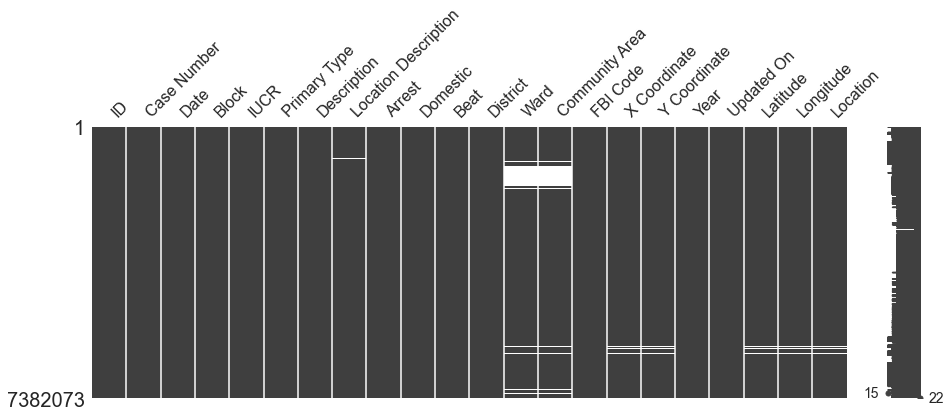

In [11]:
msno.matrix(df, figsize=(15, 5))
plt.show()

We see that location information is missing for part of the data. We see if we can impute these values.

In [12]:
df1 = df.dropna()

In [13]:
(df1.groupby(['Block','Beat','District','X Coordinate','Y Coordinate'])['Community Area'].nunique()).count()

764614

In [14]:
(df1.groupby(['Block','Beat','District','X Coordinate','Y Coordinate'])['Community Area'].nunique() > 1).sum()

4106

In [15]:
(df1.groupby(['Block','Beat','District','X Coordinate','Y Coordinate'])['Community Area'].nunique() > 2).sum()

3

In [16]:
(df1.groupby(['Block','Beat','District','X Coordinate','Y Coordinate'])['Community Area'].nunique() > 3).sum()

0

We see that if we consider location information on block, beat, district, X coordinate, and Y coordinate, it is very likely that we get a unique community area. In some cases however, we might get two options and in some very rare cases, we might get three options. Thus, we use the location information for imputing missing community areas. In cases where X and Y coordinate are missing as well, we use the rest of location information for imputing missing values.

In [17]:
df2 = df.loc[(df['Community Area'].isna())&(~df['X Coordinate'].isna())&(~df['Y Coordinate'].isna()), \
       ['Block','Beat','District','X Coordinate','Y Coordinate']]
print(df2.shape)
print(df2.drop_duplicates().shape)

(604270, 5)
(294344, 5)


In [18]:
df3 = df1[['Block','Beat','District','X Coordinate','Y Coordinate','Community Area']]

In [19]:
df4 = df2.merge(df3, how='left', on=['Block','Beat','District','X Coordinate','Y Coordinate'])

In [20]:
df4.isna().sum()

Block                  0
Beat                   0
District               0
X Coordinate           0
Y Coordinate           0
Community Area    563206
dtype: int64

In [21]:
df5 = df4.groupby(['Block','Beat','District','X Coordinate','Y Coordinate'])['Community Area'].first()
df5.shape

(294344,)

In [22]:
df5.dropna().shape

(19602,)

We see that we have not been successful in addressing the majority of missing values. Since it is likely that many of the location infomration not be used in the modeling and that part of the data be excluded due to limited computational capacity, we do not address the missing data further at least at this stage.

In [23]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

We convert the data into correct data types.

In [24]:
df['ID'] = df['ID'].astype('category')
df['Beat'] = df['Beat'].astype('category')
df['District'] = df['District'].astype('category')
df['Ward'] = df['Ward'].astype('category')
df['Ward'] = df['Ward'].astype('category')
df['Community Area'] = df['Community Area'].astype('category')

In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df['Updated On'] = pd.to_datetime(df['Updated On'])

In [26]:
df.dtypes

ID                            category
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                          category
District                      category
Ward                          category
Community Area                category
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

We explore the data further using visualizations.

<function matplotlib.pyplot.show(close=None, block=None)>

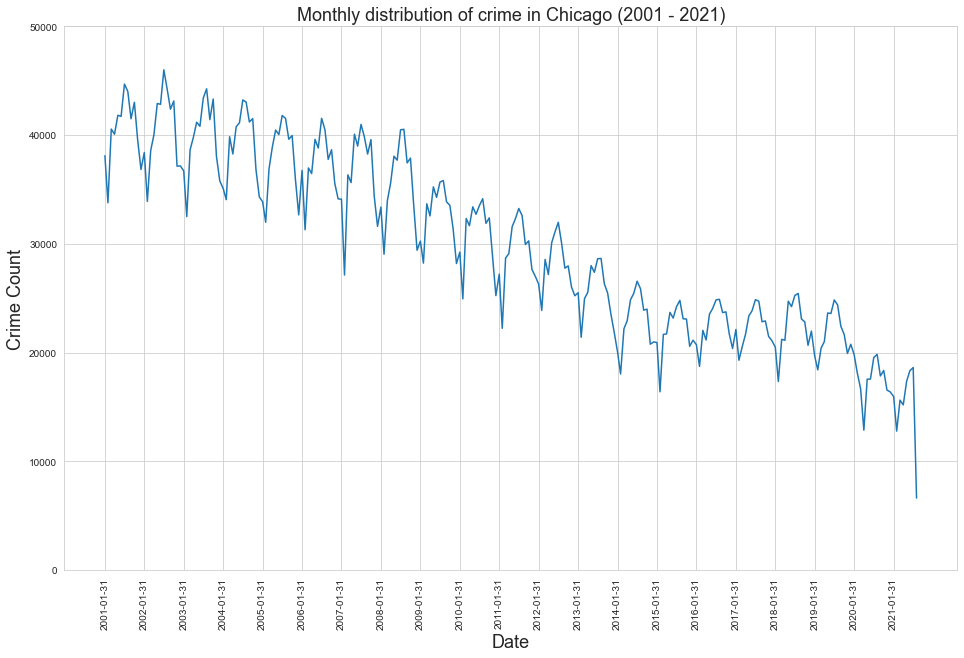

In [27]:
count = df.set_index('Date').resample('M')['ID'].count()
fig, ax = plt.subplots(figsize = (16,10))
ax.plot(count)
dates=[]
for i in np.arange(2001, 2022):
    dates.append(f'{i}-01-31 00:00:00')
ax.set_xticks(dates)
ax.set_ylim([0,50000])
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Crime Count', fontsize=18)
ax.set_title('Monthly distribution of crime in Chicago (2001 - 2021)', fontsize=18)
plt.xticks(rotation=90)
plt.show

We see that crime rate in Chicago has a seasonal pattern as well as a decreasing trend.

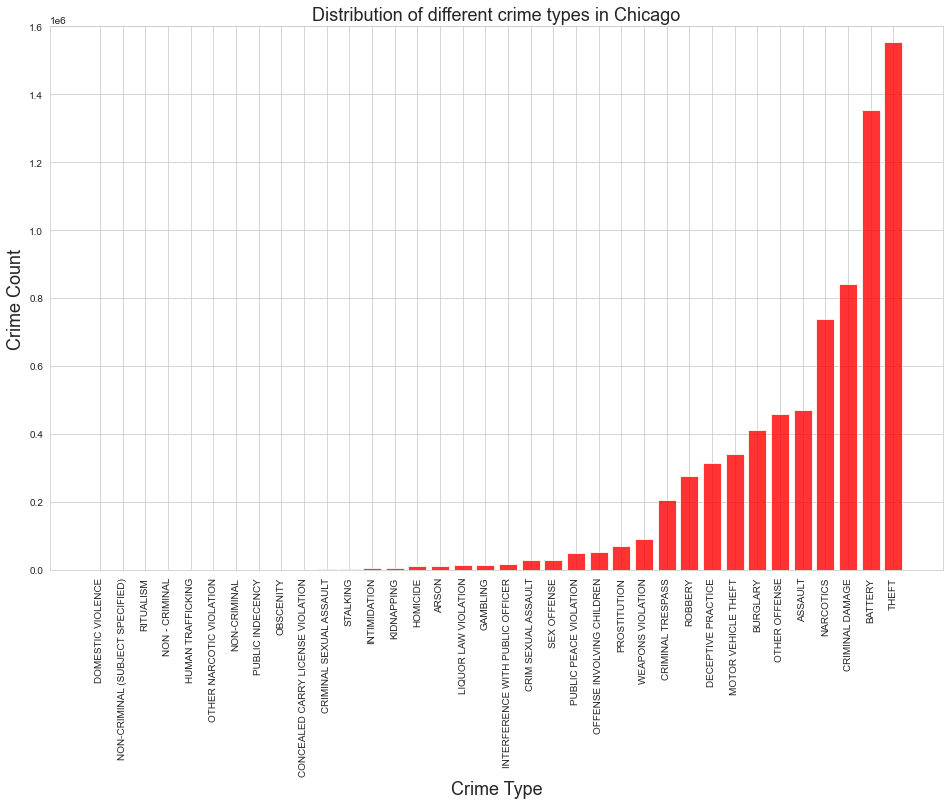

In [28]:
temp = df.groupby('Primary Type')['ID'].count().sort_values()
fig, ax = plt.subplots(figsize=(16,10))
ax.bar(temp.index, temp, color='r', alpha=0.8)
ax.set_xlabel('Crime Type', fontsize=18)
ax.set_ylabel('Crime Count', fontsize=18)
ax.set_title('Distribution of different crime types in Chicago', fontsize=18)
ax.set_ylim([0,1600000])
plt.xticks(rotation=90)
plt.show()

We see that theft followed by battery are the two most common crime types in Chicago. We now look at the distribution of crime across Chicago police districts using a heatmap.

In [29]:
dftemp = pd.read_csv('Police_Stations.csv')
dftemp2 = dftemp[dftemp['DISTRICT'] != 'Headquarters']
dftemp2['DISTRICT'] = dftemp2['DISTRICT'].astype(int)
dftemp2 = dftemp2.sort_values('DISTRICT')
a = df.groupby('District')['ID'].count().drop([21, 31])
b = dftemp2[['LATITUDE','LONGITUDE']].reset_index(drop=True)
c = b.merge(pd.DataFrame(a),left_index=True,right_index=True)

In [30]:
folium_map = folium.Map(location=[41.8781, -87.6298],
                        zoom_start=10)
folium.TileLayer('stamenterrain').add_to(folium_map)
folium.plugins.HeatMap(c.values.tolist()).add_to(folium.FeatureGroup(name='Heat Map').add_to(folium_map))
folium_map

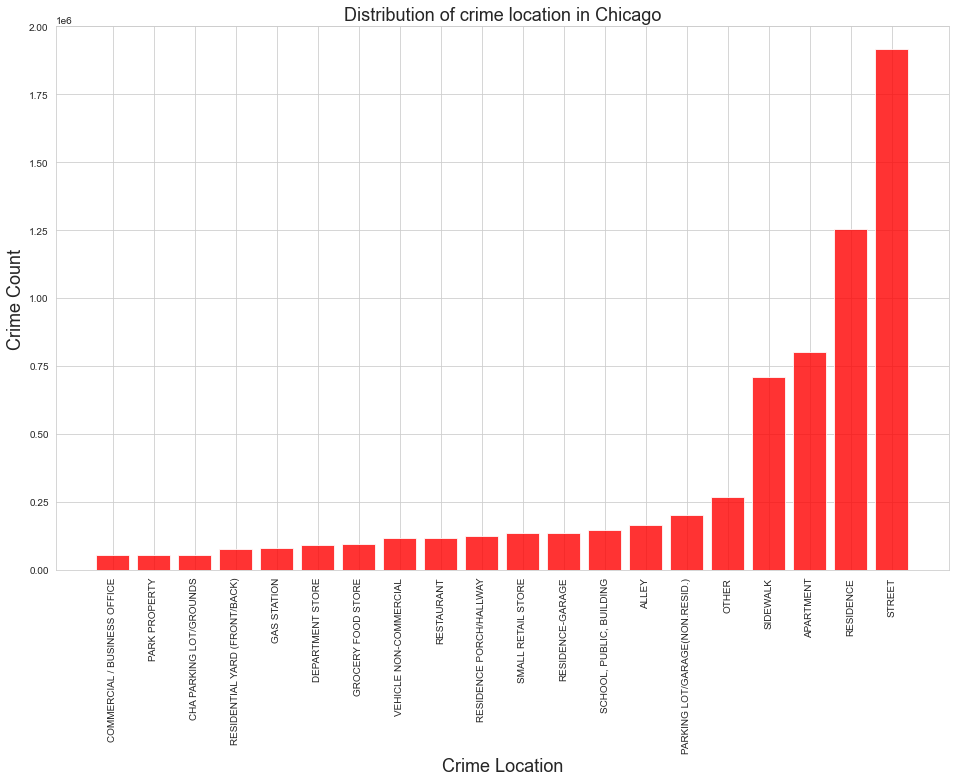

214


In [31]:
temp = df.groupby('Location Description')['ID'].count().sort_values()
fig, ax = plt.subplots(figsize=(16,10))
ax.bar(temp.index[-20:], temp[-20:], color='r', alpha=0.8)
ax.set_xlabel('Crime Location', fontsize=18)
ax.set_ylabel('Crime Count', fontsize=18)
ax.set_title('Distribution of crime location in Chicago', fontsize=18)
ax.set_ylim([0,2000000])
plt.xticks(rotation=90)
plt.show()
print(df['Location Description'].nunique())

We see that there are 214 differet locations for crime in Chicago, and street followed by residence are the most common locations.

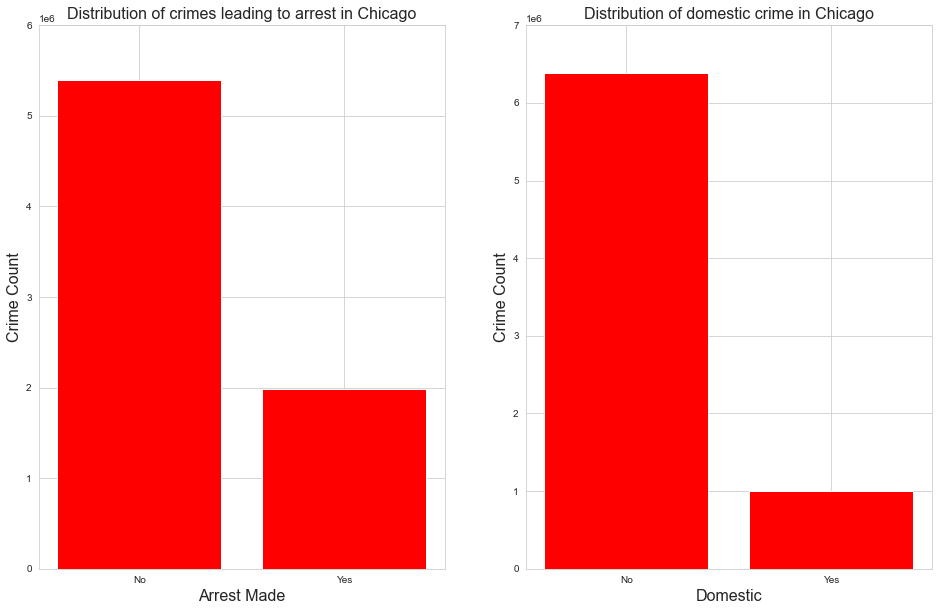

In [32]:
temp = df.groupby('Arrest')['ID'].count().sort_values()
fig, ax = plt.subplots(1,2,figsize=(16,10))
ax[0].bar(temp.index, temp, color='r')
ax[0].set_xticks([0,1])
ax[0].set_xticklabels(['No','Yes'])
ax[0].set_xlabel('Arrest Made', fontsize=16)
ax[0].set_ylabel('Crime Count', fontsize=16)
ax[0].set_title('Distribution of crimes leading to arrest in Chicago', fontsize=16)
ax[0].set_ylim([0,6000000])

temp = df.groupby('Domestic')['ID'].count().sort_values()
ax[1].bar(temp.index, temp, color='r')
ax[1].set_xticks([0,1])
ax[1].set_xticklabels(['No','Yes'])
ax[1].set_xlabel('Domestic', fontsize=16)
ax[1].set_ylabel('Crime Count', fontsize=16)
ax[1].set_title('Distribution of domestic crime in Chicago', fontsize=16)
ax[1].set_ylim([0,7000000])

plt.show()

We see that a smaller percentage of crimes in Chicago lead to arrest and most crimes are not domestic.

We see that the important features of our dataset are associated with either location, date, or type of a crime. We will assess our dataset further during preprocessing and modeling phases.

In [33]:
df.to_csv('Chicago_crime_data_ready_for_preprocessing.csv')